In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

In [ ]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
Ravdess = "/gdrive/MyDrive/Empathic_Art/Audio_Speech_Actors/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/gdrive/MyDrive/Empathic_Art/Audio_Speech_Acto...
1,neutral,/gdrive/MyDrive/Empathic_Art/Audio_Speech_Acto...
2,neutral,/gdrive/MyDrive/Empathic_Art/Audio_Speech_Acto...
3,neutral,/gdrive/MyDrive/Empathic_Art/Audio_Speech_Acto...
4,happy,/gdrive/MyDrive/Empathic_Art/Audio_Speech_Acto...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


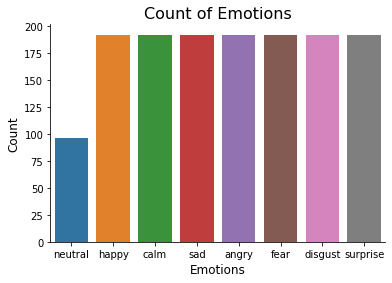

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
emotion = []
gender = []
path = []
for dir in ravdess_directory_list:
    fname = os.listdir(Ravdess + dir)
    for file in fname:
        part = file.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(Ravdess + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_happy       96
female_calm        96
female_sad         96
female_angry       96
female_fear        96
female_disgust     96
female_surprise    96
male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_fear          96
male_disgust       96
male_surprise      96
female_neutral     48
male_neutral       48
Name: labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


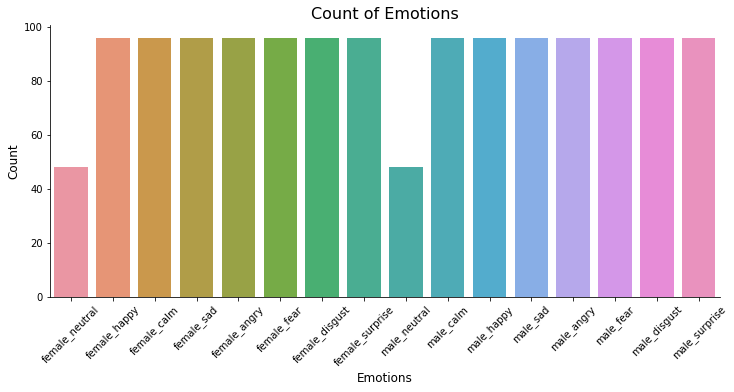

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(RAV_df.labels)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
actors = ['Actor_'+str(i).zfill(2) for i in range(1, 25)]

In [ ]:
columns = ['File', 'Modality', 'Vocal', 'Emotion', 'Intensity', 'Statement', 'Repetition', 'Actor']
df = pd.DataFrame(columns = columns)
files = []
for actor in actors:
    files.extend(os.listdir(Ravdess+actor))
df['File'] = files
file = files[0]
for i in range(len(files)):
    file = files[i]
    integer_list = list(map(int, file.split('.')[0].split('-')))
    df.loc[i, df.columns[1:]] = integer_list

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = * fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).



In [ ]:
df.head()

,File,Modality,Vocal,Emotion,Intensity,Statement,Repetition,Actor
0,03-01-01-01-01-02-01.wav,3,1,1,1,1,2,1
1,03-01-01-01-02-02-01.wav,3,1,1,1,2,2,1
2,03-01-01-01-01-01-01.wav,3,1,1,1,1,1,1
3,03-01-01-01-02-01-01.wav,3,1,1,1,2,1,1
4,03-01-02-02-01-01-01.wav,3,1,2,2,1,1,1


In [ ]:
df.tail()

,File,Modality,Vocal,Emotion,Intensity,Statement,Repetition,Actor
1435,03-01-08-02-01-01-24.wav,3,1,8,2,1,1,24
1436,03-01-07-02-02-01-24.wav,3,1,7,2,2,1,24
1437,03-01-08-02-02-01-24.wav,3,1,8,2,2,1,24
1438,03-01-08-02-02-02-24.wav,3,1,8,2,2,2,24
1439,03-01-08-02-01-02-24.wav,3,1,8,2,1,2,24


In [ ]:
df.Intensity.value_counts()

1    768
2    672
Name: Intensity, dtype: int64

In [ ]:
df.Statement.value_counts()

1    720
2    720
Name: Statement, dtype: int64

In [ ]:
df.Repetition.value_counts()

2    720
1    720
Name: Repetition, dtype: int64

In [ ]:
df.Actor.value_counts()

1     60
2     60
23    60
22    60
21    60
20    60
19    60
18    60
17    60
16    60
15    60
14    60
13    60
12    60
11    60
10    60
9     60
8     60
7     60
6     60
5     60
4     60
3     60
24    60
Name: Actor, dtype: int64

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

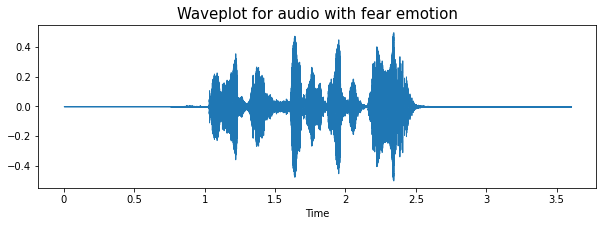

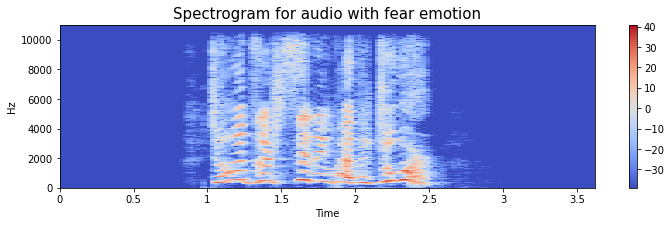

In [ ]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

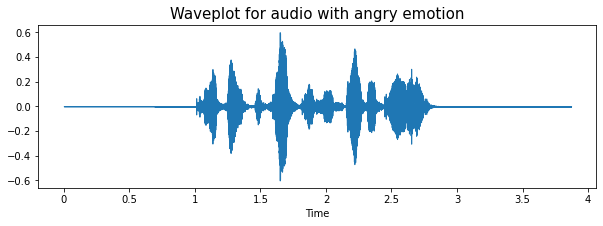

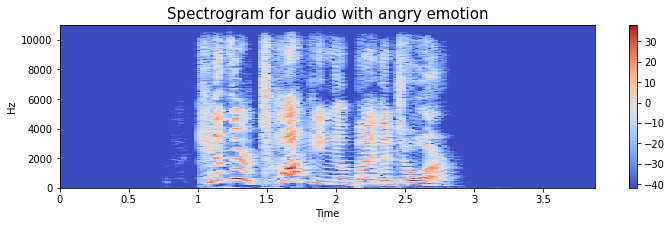

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

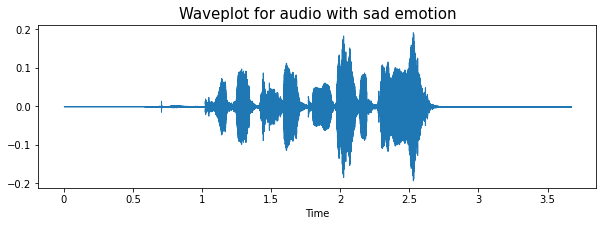

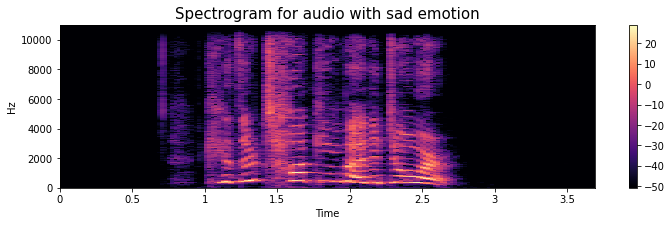

In [ ]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

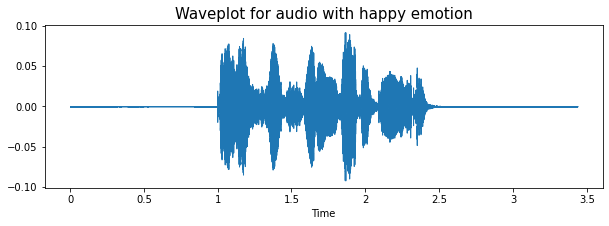

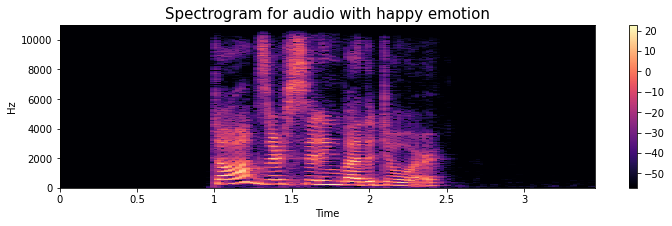

In [ ]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

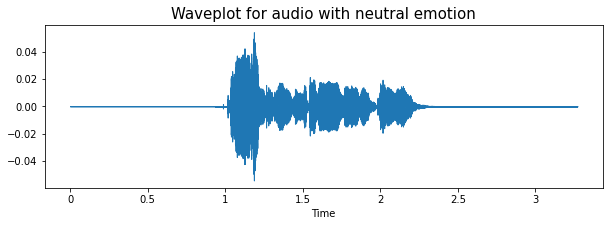

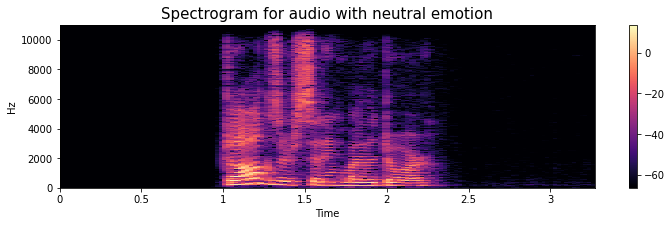

In [ ]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

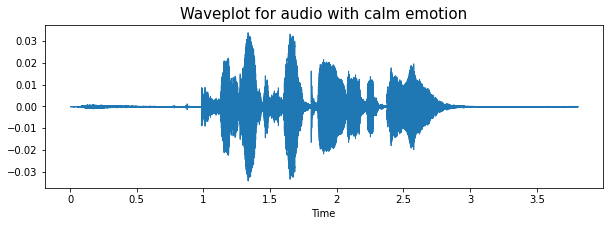

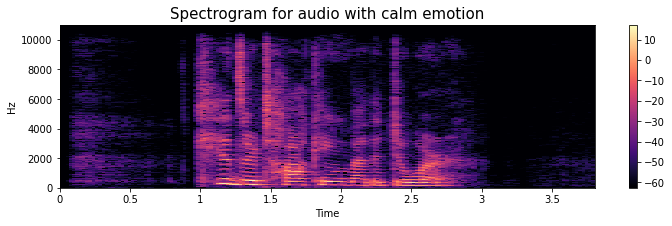

In [ ]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(Ravdess_df.Path)[1]
data, sample_rate = librosa.load(path)

TypeError: ignored

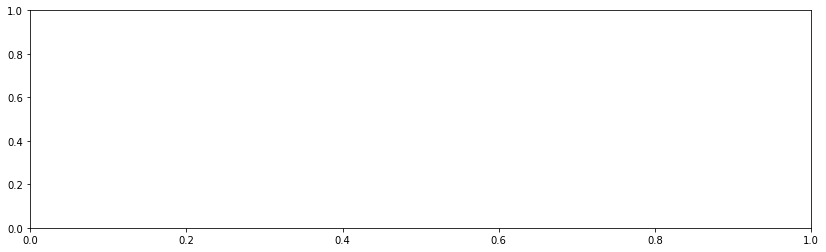

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=Ravdess_df)
Audio(path)